In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for AWS compute node


No vtk


# Global

In [4]:
# classifier_id = 38
detector_id = 15
# warp_setting = 16 # with surr
warp_setting = 20 # no surr

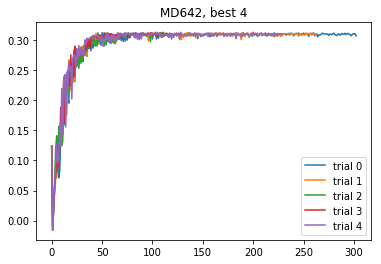

In [11]:
# For one stack, plot all trials.

stack = 'MD585'

scores_all_trials = []

for trial_idx in range(5):
    try:
        fp = DataManager.get_alignment_result_filepath(stack_m='atlasV5', 
                                                  stack_f=stack,
                                                  detector_id_f=detector_id,
                                                  prep_id_f=2,
                                                  warp_setting=warp_setting,
                                                 trial_idx=trial_idx, what='scoreHistory')
        download_from_s3(fp)
        scores = bp.unpack_ndarray_file(fp)
        scores_all_trials.append(scores)
        plt.plot(scores, label='trial '+ str(trial_idx));
    except Exception as e:
        sys.stderr.write('Scores for trial %d does not exist.\n' % (trial_idx))
        continue

best_scores_each_trial = np.argsort([np.max(scores) for scores in scores_all_trials])
if len(best_scores_each_trial) > 0:
    best_trial = best_scores_each_trial[-1]

plt.title('%s, best %d' % (stack, best_trial));
plt.legend()
plt.show()

In [42]:
# # If no trial_idx specified, should be the best one.

# fp = DataManager.get_score_history_filepath(stack_m='atlasV3', stack_f=stack, warp_setting=warp_setting, 
#                                                classifier_setting_m=classifier_id, classifier_setting_f=classifier_id, 
#                                             downscale=32)
# scores = bp.unpack_ndarray_file(fp)
# scores_all_trials.append(scores)
# plt.plot(scores, label='trial '+ str(trial_idx));

In [5]:
detector_id = 15
# warp_setting = 16 # with surr
warp_setting = 20 # no surr

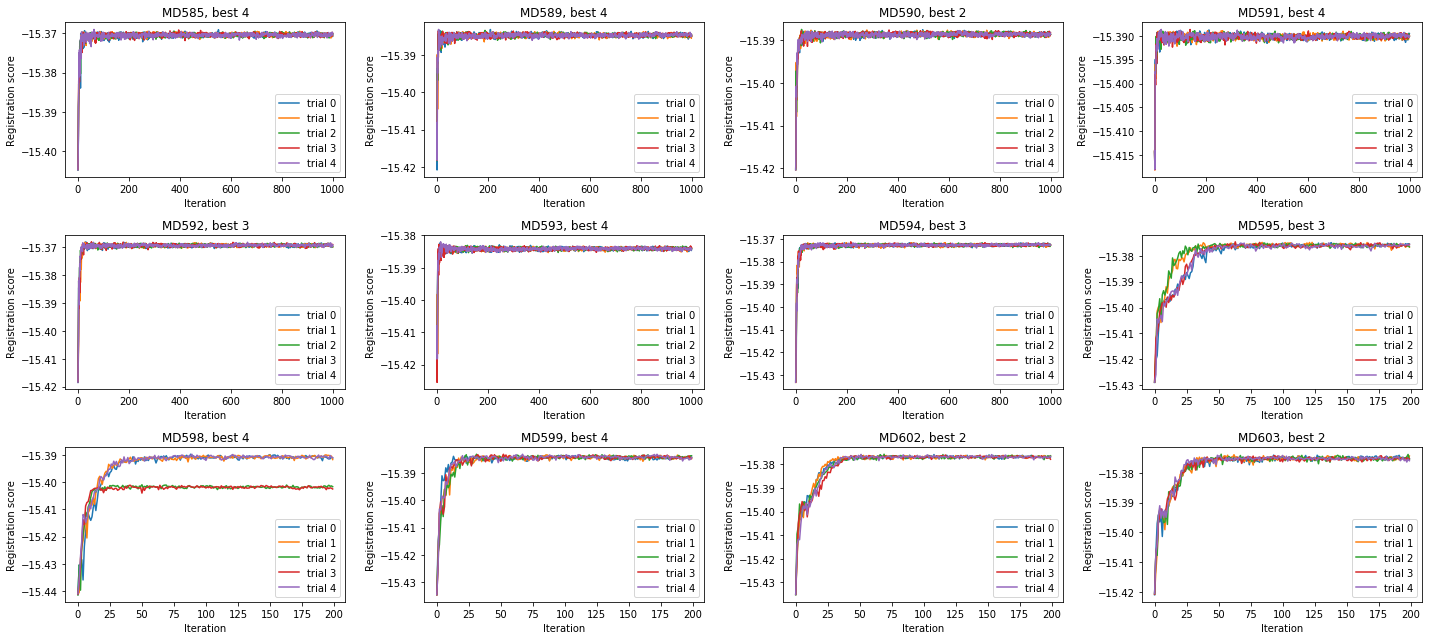

In [7]:
# See many stacks

stacks = all_nissl_stacks

nc = 4
nr = int(np.ceil(len(stacks)/float(nc)))
fig, axes = plt.subplots(nrows=nr, ncols=nc, figsize=(nc*5,nr*3));
axes = axes.flatten()

for i, stack in enumerate(sorted(stacks)):
    
    scores_all_trials = []
    for trial_idx in range(5):
        try:
            fp = DataManager.get_alignment_result_filepath(stack_m='atlasV5', 
                                                              stack_f=stack,
                                                              detector_id_f=detector_id,
                                                              prep_id_f=2,
                                                              warp_setting=warp_setting,
                                                             trial_idx=trial_idx, what='scoreHistory')
            download_from_s3(fp)
            scores = bp.unpack_ndarray_file(fp)
            scores_all_trials.append(scores)
            axes[i].plot(scores, label='trial '+ str(trial_idx));
        except Exception as e:
            sys.stderr.write('Scores for trial %d does not exist.\n' % (trial_idx))
            continue
        
    best_scores_each_trial = np.argsort([np.max(scores) for scores in scores_all_trials])
    if len(best_scores_each_trial) > 0:
        best_trial = best_scores_each_trial[-1]
#         scores = scores_all_trials[best_trial]        
#         axes[i].plot(scores, label='trial '+ str(best_trial));
        
    axes[i].set_title('%s, best %d' % (stack, best_trial));
    axes[i].set_xlabel('Iteration');
    axes[i].set_ylabel('Registration score');
    axes[i].legend();

plt.tight_layout()
plt.show()

# Local

In [2]:
detector_id = 15
warp_setting = 17

In [5]:
# One stack, all structures, all trials

stack = 'MD602'
atlas_name = 'atlasV5'

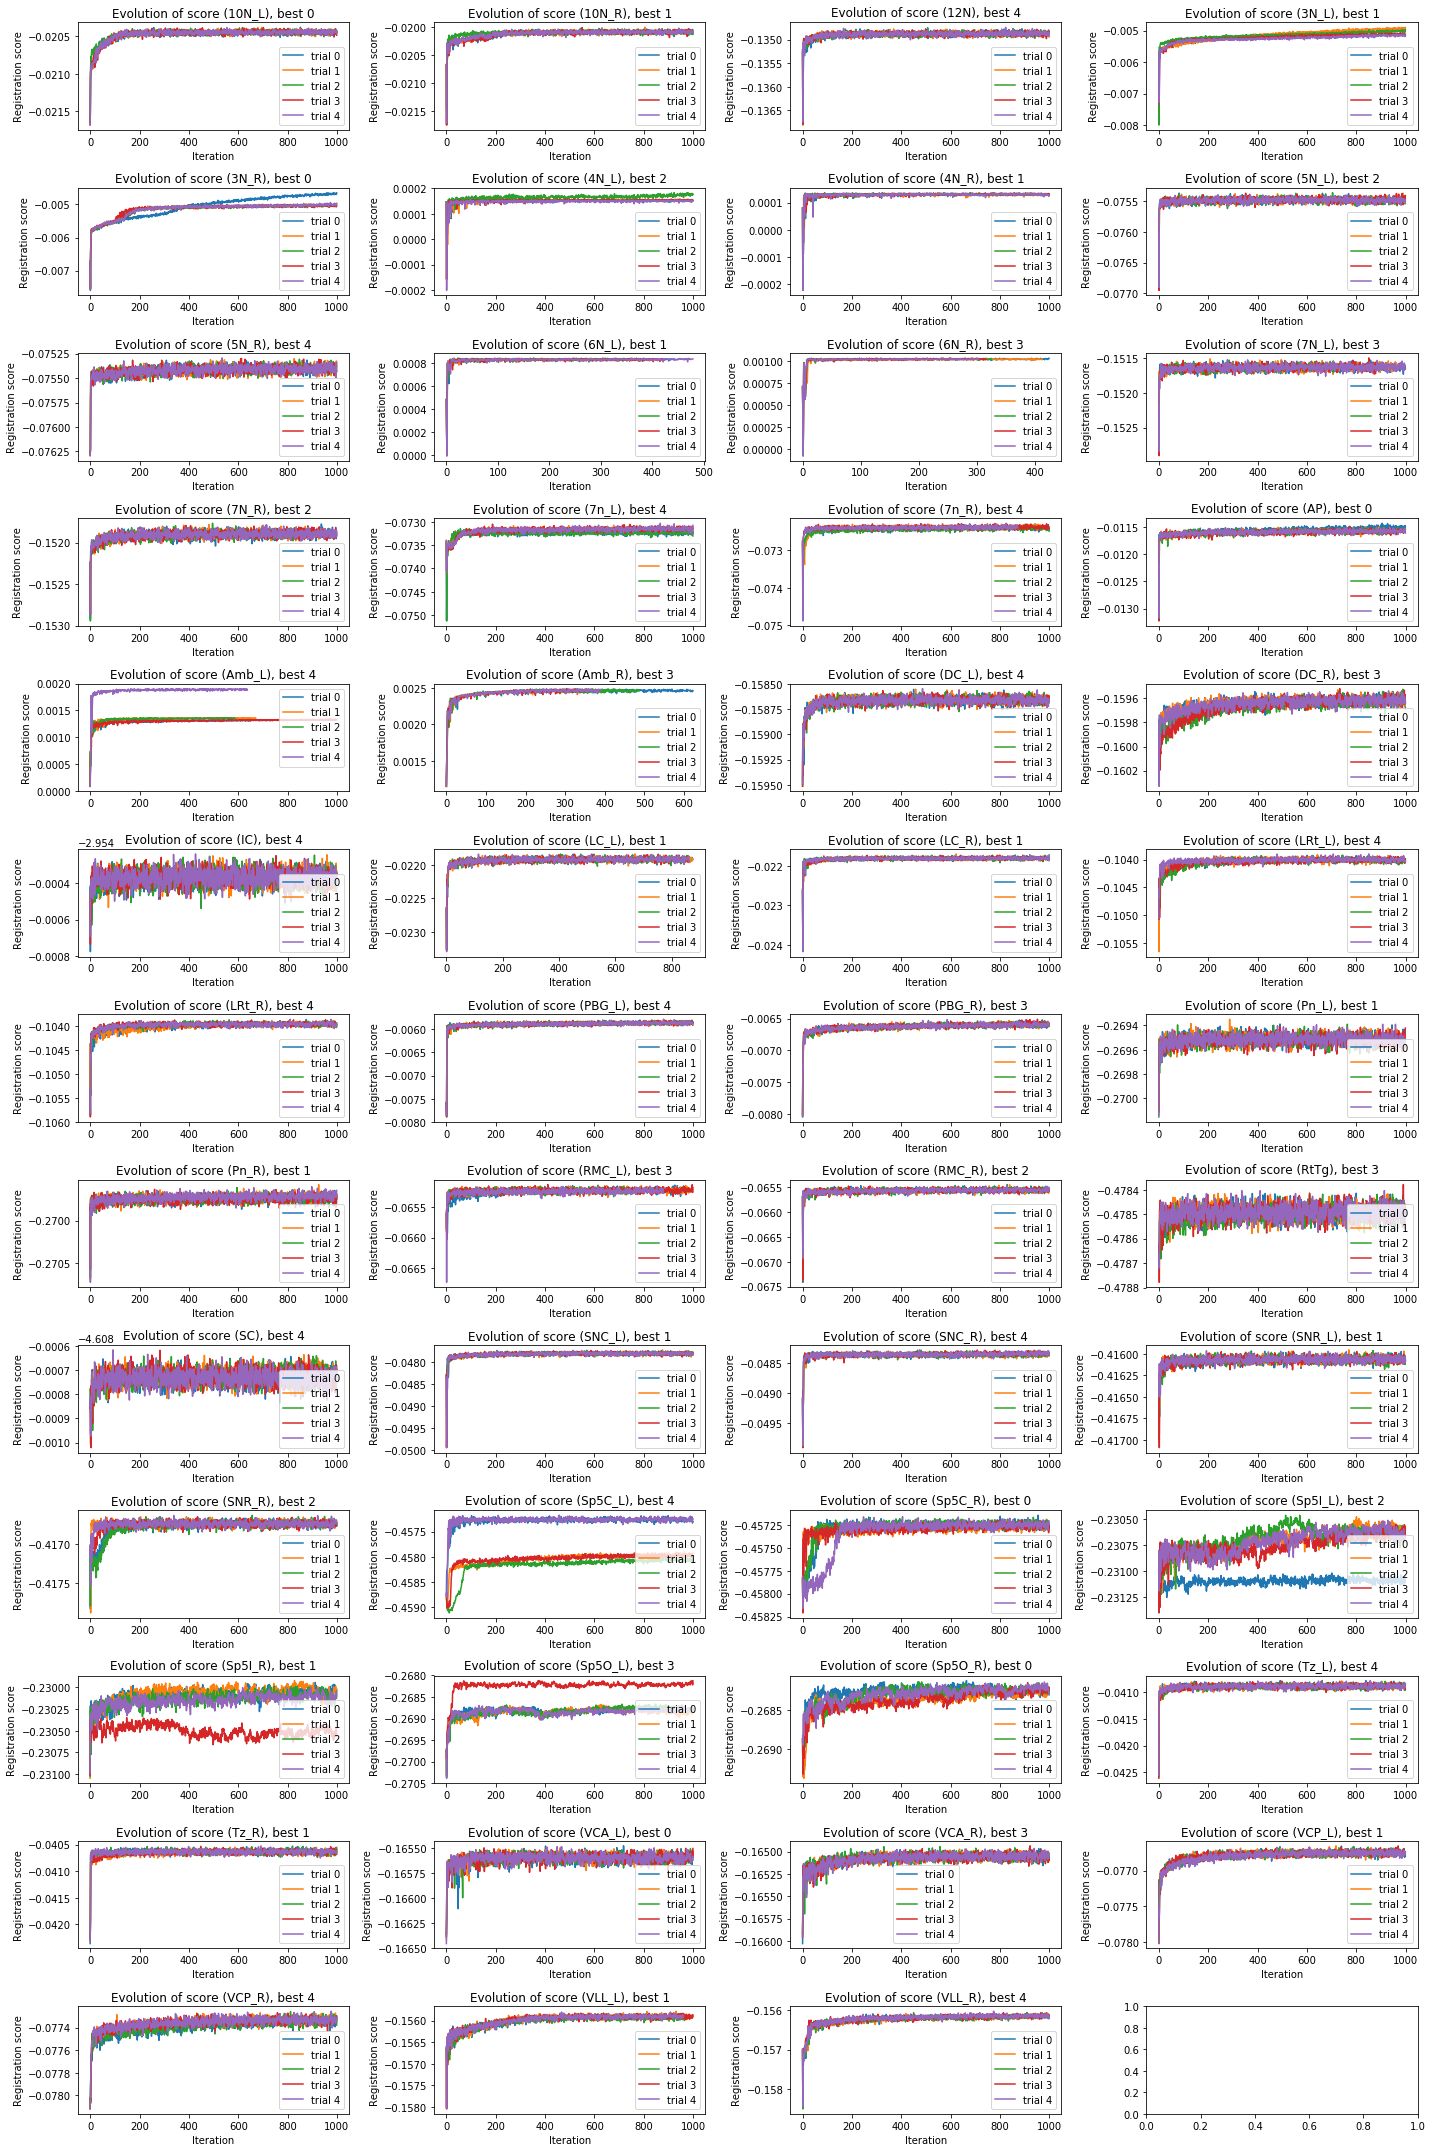

In [6]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(all_known_structures_sided)/4.)), ncols=4, figsize=(20,30));
axes = axes.flatten()

best_trial_by_structure = {}

for i, structure in enumerate(sorted(all_known_structures_sided)):
# for i, structure in enumerate(sorted(['5N_L', '7N_L'])):
    
    scores_all_trials = []

    for trial_idx in range(5):
        try:
            fp = DataManager.get_alignment_result_filepath(stack_m=atlas_name, stack_f=stack, 
                                                           warp_setting=warp_setting, 
                                                           structure_m=structure,
                                                           structure_f=structure,
                                                           prep_id_f=2,
                                                           detector_id_f=detector_id, 
                                                           downscale=32, trial_idx=trial_idx, 
                                                          what='scoreHistory')
            download_from_s3(fp)
            scores = bp.unpack_ndarray_file(fp)
            scores_all_trials.append(scores)
            axes[i].plot(scores, label='trial '+ str(trial_idx));
        except Exception as e:
            sys.stderr.write('Scores for (%s, %d) does not exist.\n' % (structure, trial_idx))
            continue

    if len(scores_all_trials) > 0:
            
        best_scores_each_trial = np.argsort([np.max(scores) for scores in scores_all_trials])
        if len(best_scores_each_trial) > 0:
            best_trial = best_scores_each_trial[-1]
            scores = scores_all_trials[best_trial]       
    #         axes[i].plot(scores, label='trial '+ str(best_trial));
            best_trial_by_structure[structure] = best_trial

        axes[i].set_title('Evolution of score (%s), best %d' % (structure, best_trial));
        axes[i].set_xlabel('Iteration');
        axes[i].set_ylabel('Registration score');
        axes[i].legend();    

plt.tight_layout()
plt.show()

In [8]:
# One stack, one structure, all trials

# structure = '7N_L'
# plt.figure(figsize=(20,8));
# for trial_idx in range(5):
#     try:
#         fp = DataManager.get_score_history_filepath(stack_m='atlasV3', stack_f=stack, warp_setting=warp_setting, 
#                                                classifier_setting_m=classifier_id, classifier_setting_f=classifier_id, 
#                                                param_suffix=structure, downscale=32, trial_idx=trial_idx)
#         scores = bp.unpack_ndarray_file(fp)

#         plt.plot(scores, label='trial '+ str(trial_idx));
#         plt.title('Evolution of score (%s)' % structure);
#         plt.xlabel('Iteration');
#         plt.ylabel('Registration score');
#     except:
#         sys.stderr.write('Scores for %s does not exist.\n' % structure)
#         continue
# plt.legend()
# plt.show()